<a href="https://colab.research.google.com/github/SashlynNade/CFC_Analysis/blob/main/Chelsea_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# This code will show the individual result of all the games Chelsea have played between 2000-2018

import pandas as pd

#Creates a pathway for the code to access the specific file to access the data required
excel_file_path = "final_dataset.xlsx"

#Code will then read the Excel file it is directed to and fliter out the specific results of Chelsea Football Club
df = pd.read_excel(excel_file_path)

#Filter games involving Chelsea
chelsea_games = df[(df['HomeTeam'].str.contains('Chelsea')) | (df['AwayTeam'].str.contains('Chelsea'))]

#Prints the games in which Cheslea have played in and the results (Winner or Draw)
for index, row in chelsea_games.iterrows():
    print(f"{row['HomeTeam']} vs {row['AwayTeam']}: {row['FTW']}")


Chelsea vs West Ham: Chelsea
Bradford vs Chelsea: Bradford
Aston Villa vs Chelsea: Draw
Chelsea vs Arsenal: Draw
Newcastle vs Chelsea: Draw
Chelsea vs Leicester: Leicester
Man United vs Chelsea: Draw
Chelsea vs Liverpool: Chelsea
Sunderland vs Chelsea: Sunderland
Chelsea vs Coventry: Chelsea
Chelsea vs Tottenham: Chelsea
Southampton vs Chelsea: Southampton
Chelsea vs Leeds: Draw
Charlton vs Chelsea: Charlton
Everton vs Chelsea: Everton
Chelsea vs Man City: Chelsea
Chelsea vs Derby: Chelsea
Middlesbrough vs Chelsea: Middlesbrough
Chelsea vs Bradford: Chelsea
Ipswich vs Chelsea: Draw
Chelsea vs Aston Villa: Chelsea
Arsenal vs Chelsea: Draw
Chelsea vs Ipswich: Chelsea
Chelsea vs Newcastle: Chelsea
Leicester vs Chelsea: Leicester
Chelsea vs Man United: Draw
Coventry vs Chelsea: Draw
West Ham vs Chelsea: Chelsea
Chelsea vs Sunderland: Sunderland
Chelsea vs Middlesbrough: Chelsea
Derby vs Chelsea: Chelsea
Chelsea vs Southampton: Chelsea
Tottenham vs Chelsea: Chelsea
Chelsea vs Charlton: Char

In [ ]:
#In this section of code, I have displayed the data to be viewer friendly.
#The code will display the amount of games in which Chelsea have played, a break down of games they have won, lost or drawn as well as a win %

import pandas as pd

# Open the Excel file
excel_file_path = "final_dataset.xlsx"

# Read the Excel file and filter results for Chelsea games
df = pd.read_excel(excel_file_path)
chelsea_games = df[(df['HomeTeam'].str.contains('Chelsea')) | (df['AwayTeam'].str.contains('Chelsea'))]

# Initialize variables to keep track of statistics
total_games_played = 0
games_won = 0
games_drawn = 0
games_lost = 0

# Iterate through Chelsea games and calculate statistics
for index, row in chelsea_games.iterrows():
    total_games_played += 1
    result = row['FTW']

    if 'Chelsea' in row['HomeTeam']:
        chelsea_team = 'HomeTeam'
        opponent_team = 'AwayTeam'
    else:
        chelsea_team = 'AwayTeam'
        opponent_team = 'HomeTeam'

    # Check the result of the game and update statistics
    if result == 'Draw':
        games_drawn += 1
    elif result == 'Chelsea' and row[chelsea_team] == 'Chelsea':
        games_won += 1
    elif result != 'Chelsea' and row[opponent_team] != 'Chelsea':
        games_lost += 1

# Calculate the win percentage
win_percentage = (games_won / total_games_played) * 100

# Display the statistics
print(f"Total number of games played involving Chelsea: {total_games_played}")
print(f"Games won by Chelsea: {games_won}")
print(f"Games drawn by Chelsea: {games_drawn}")
print(f"Games lost by Chelsea: {games_lost}")
print(f"Chelsea's win percentage: {win_percentage:.2f}%")


Total number of games played involving Chelsea: 684
Games won by Chelsea: 411
Games drawn by Chelsea: 153
Games lost by Chelsea: 120
Chelsea's win percentage: 60.09%


In [11]:
#In this section of code, I have displayed the data to be viewer friendly.
#The code will display the amount of goals scored in which Chelsea have played, and the amount of goals conceded

import pandas as pd

# Open the Excel file
excel_file_path = "final_dataset.xlsx"

# Read the Excel file and filter results for Chelsea games
df = pd.read_excel(excel_file_path)
chelsea_games = df[(df['HomeTeam'].str.contains('Chelsea')) | (df['AwayTeam'].str.contains('Chelsea'))]

# Initialize variables to keep track of statistics
total_games_played =len(chelsea_games)
goals_scored = 0
goals_conceded = 0

# Dictionary to store teams in which Chelsea have scored or conceded the most goals against
teams_scored_against = {}
teams_conceded_to = {}

# Iterate through Chelsea games and calculate statistics
for index, row in chelsea_games.iterrows():
    opponent_team = row['AwayTeam'] if 'Chelsea' in row['HomeTeam'] else row['HomeTeam']
    goals_scored += int(row['FTHG'])
    goals_conceded += int(row['FTAG'])

# Update goals scored and conceded by opponent
    teams_scored_against[opponent_team] = teams_scored_against.get(opponent_team, 0) + int(row['FTHG'])
    teams_conceded_to[opponent_team] = teams_conceded_to.get(opponent_team, 0) + int(row['FTAG'])

# Sort opponents by goals scored and conceded
top_teams_by_goals_scored = dict(sorted(teams_scored_against.items(), key=lambda x: x[1], reverse=True)[:6])
top_teams_by_goals_conceded = dict(sorted(teams_conceded_to.items(), key=lambda x: x[1], reverse=True)[:6])

# Display the statistics
print(f"Total number of games played involving Chelsea: {total_games_played}")
print(f"Total goals scored by Chelsea: {goals_scored}")
print(f"Total goals conceded by Chelsea: {goals_conceded}")
print("")
print("Top 6 teams Chelsea has scored the most goals against:")
for team, goals in top_teams_by_goals_scored.items():
    print(f"{team}: {goals} goals")

print("\nTop 6 teams Chelsea has conceded the most goals to:")
for team, goals in top_teams_by_goals_conceded.items():
    print(f"{team}: {goals} goals")

Total number of games played involving Chelsea: 684
Total goals scored by Chelsea: 1060
Total goals conceded by Chelsea: 807

Top 6 teams Chelsea has scored the most goals against:
Tottenham: 61 goals
Newcastle: 59 goals
Aston Villa: 58 goals
Sunderland: 56 goals
Everton: 55 goals
Arsenal: 54 goals

Top 6 teams Chelsea has conceded the most goals to:
Tottenham: 43 goals
Sunderland: 42 goals
West Ham: 40 goals
Arsenal: 40 goals
Bolton: 38 goals
Aston Villa: 37 goals


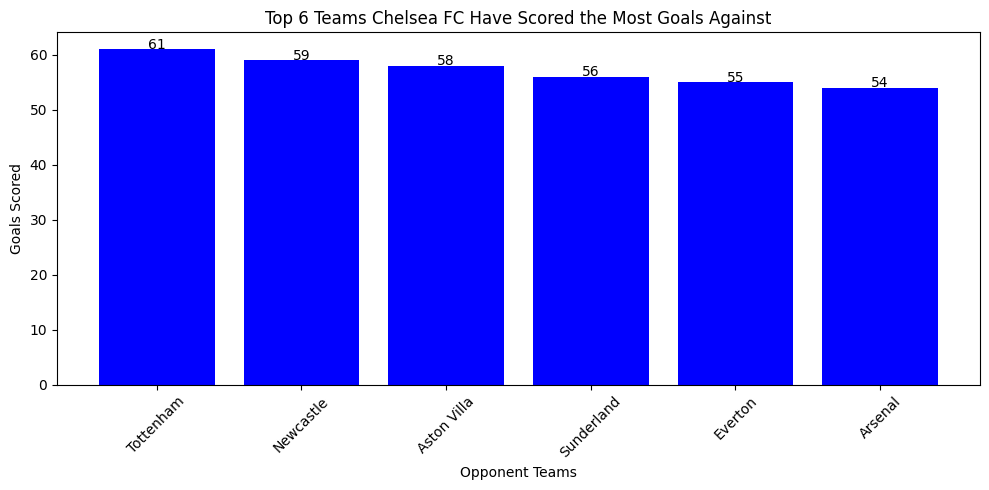

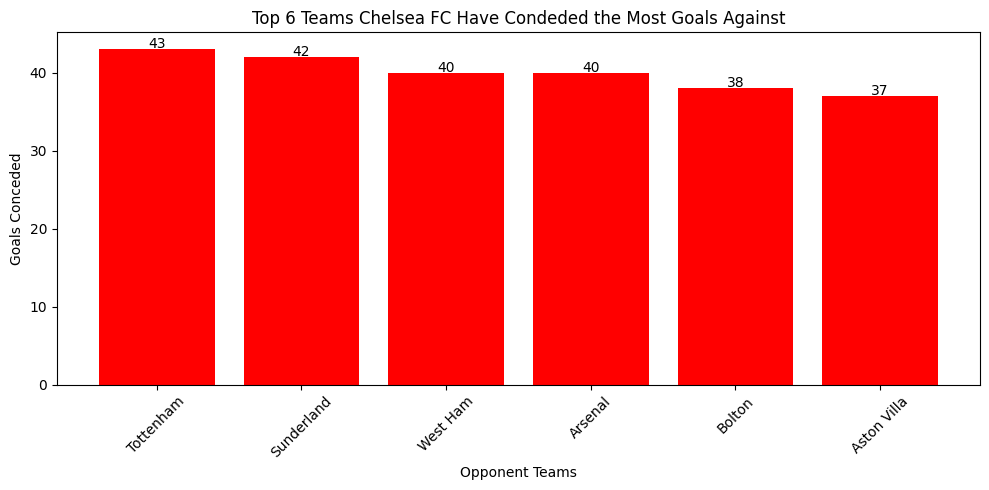

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Open the Excel file
excel_file_path = "final_dataset.xlsx"

# Read the Excel file and filter results for Chelsea games
df = pd.read_excel(excel_file_path)
chelsea_games = df[(df['HomeTeam'].str.contains('Chelsea')) | (df['AwayTeam'].str.contains('Chelsea'))]

# Initialize variables to keep track of statistics
total_games_played = len(chelsea_games)
goals_scored = 0
goals_conceded = 0

# Dictionary to store teams in which Chelsea have scored or conceded the most goals against
teams_scored_against = {}
teams_conceded_to = {}

# Iterate through Chelsea games and calculate statistics
for index, row in chelsea_games.iterrows():
    opponent_team = row['AwayTeam'] if 'Chelsea' in row['HomeTeam'] else row['HomeTeam']
    goals_scored += int(row['FTHG'])
    goals_conceded += int(row['FTAG'])
    teams_scored_against[opponent_team] = teams_scored_against.get(opponent_team, 0) + int(row['FTHG'])
    teams_conceded_to[opponent_team] = teams_conceded_to.get(opponent_team, 0) + int(row['FTAG'])

# Sort opponents by goals scored and conceded
top_teams_by_goals_scored = dict(sorted(teams_scored_against.items(), key=lambda x: x[1], reverse=True)[:6])
top_teams_by_goals_conceded = dict(sorted(teams_conceded_to.items(), key=lambda x: x[1], reverse=True)[:6])

# Data for plotting
teams_scored = list(top_teams_by_goals_scored.keys())
goals_scored_values = list(top_teams_by_goals_scored.values())
teams_conceded = list(top_teams_by_goals_conceded.keys())
goals_conceded_values = list(top_teams_by_goals_conceded.values())

# Plotting goals scored
plt.figure(figsize=(10, 5))
plt.bar(teams_scored, goals_scored_values, color='blue')
plt.xlabel('Opponent Teams')
plt.ylabel('Goals Scored')
plt.title('Top 6 Teams Chelsea FC Have Scored the Most Goals Against')
plt.xticks(rotation=45)

# Adding numbers on top of the bars
for i, v in enumerate(goals_scored_values):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()

# Plotting goals conceded
plt.figure(figsize=(10, 5))
plt.bar(teams_conceded, goals_conceded_values, color='red')
plt.xlabel('Opponent Teams')
plt.ylabel('Goals Conceded')
plt.title('Top 6 Teams Chelsea FC Have Condeded the Most Goals Against')
plt.xticks(rotation=45)

# Adding numbers on top of the bars
for i, v in enumerate(goals_conceded_values):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Open the Excel file
excel_file_path = "final_dataset.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Define function to calculate season start and end dates
def calculate_season_dates(year):
    season_start = pd.Timestamp(f"{year}-08-01")
    season_end = pd.Timestamp(f"{year + 1}-05-31")
    return season_start, season_end

# Initialize an empty list to store season start and end dates
season_dates = []

# Calculate season start and end dates for each unique year in the dataset
for year in df['Year'].unique():
    season_start, season_end = calculate_season_dates(year)
    season_dates.append((season_start, season_end))

# Filter results for Chelsea games within the specified date range for each season
filtered_chelsea_games = []
for season_start, season_end in season_dates:
    season_chelsea_games = df[
        ((df['HomeTeam'].str.contains('Chelsea')) | (df['AwayTeam'].str.contains('Chelsea'))) &
        (df['Date'] >= season_start) & (df['Date'] <= season_end)
    ]
    filtered_chelsea_games.append((season_start, season_end, season_chelsea_games))

# Calculate total goals scored and conceded by Chelsea for each season up to 2018
goals_by_season = []
for start_date, end_date, season_chelsea_games in filtered_chelsea_games:
    end_year = end_date.year
    if end_year <= 2018:
        total_goals_scored = season_chelsea_games['FTHG'].sum()
        total_goals_conceded = season_chelsea_games['FTAG'].sum()
        goals_by_season.append({'Season Start': start_date, 'Season End': end_date, 'Total Goals Scored': total_goals_scored, 'Total Goals Conceded': total_goals_conceded})

# Display the date range and total goals scored and conceded by Chelsea in each season up to 2018
for goals_data in goals_by_season:
    season_start_year = goals_data['Season Start'].strftime('%Y')
    season_end_year = goals_data['Season End'].strftime('%Y')
    print(f"Season: {season_start_year}-{season_end_year}")
    print(f"Total Goals Scored: {goals_data['Total Goals Scored']}")
    print(f"Total Goals Conceded: {goals_data['Total Goals Conceded']}")
    print("\n")


Season: 2000-2001
Total Goals Scored: 69
Total Goals Conceded: 44


Season: 2001-2002
Total Goals Scored: 60
Total Goals Conceded: 44


Season: 2002-2003
Total Goals Scored: 64
Total Goals Conceded: 42


Season: 2003-2004
Total Goals Scored: 51
Total Goals Conceded: 46


Season: 2004-2005
Total Goals Scored: 44
Total Goals Conceded: 43


Season: 2005-2006
Total Goals Scored: 60
Total Goals Conceded: 34


Season: 2006-2007
Total Goals Scored: 50
Total Goals Conceded: 38


Season: 2007-2008
Total Goals Scored: 49
Total Goals Conceded: 42


Season: 2008-2009
Total Goals Scored: 45
Total Goals Conceded: 47


Season: 2009-2010
Total Goals Scored: 86
Total Goals Conceded: 49


Season: 2010-2011
Total Goals Scored: 59
Total Goals Conceded: 43


Season: 2011-2012
Total Goals Scored: 63
Total Goals Conceded: 48


Season: 2012-2013
Total Goals Scored: 64
Total Goals Conceded: 50


Season: 2013-2014
Total Goals Scored: 59
Total Goals Conceded: 39


Season: 2014-2015
Total Goals Scored: 59
Total G

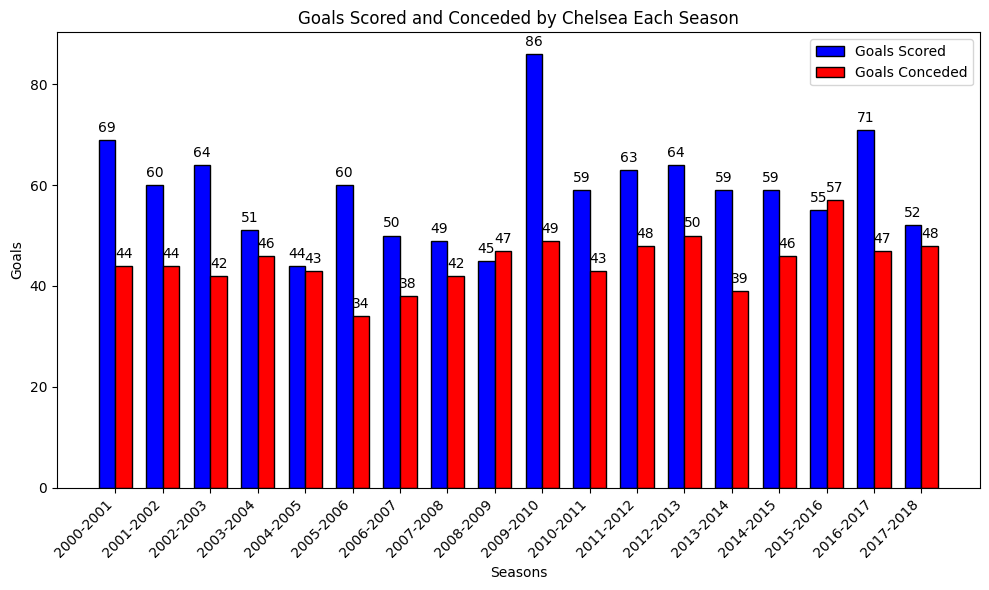

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Open the Excel file
excel_file_path = "final_dataset.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Define function to calculate season start and end dates
def calculate_season_dates(year):
    season_start = pd.Timestamp(f"{year}-08-01")
    season_end = pd.Timestamp(f"{year + 1}-05-31")
    return season_start, season_end

# Initialize an empty list to store season start and end dates
season_dates = []

# Calculate season start and end dates for each unique year in the dataset
for year in df['Year'].unique():
    season_start, season_end = calculate_season_dates(year)
    season_dates.append((season_start, season_end))

# Filter results for Chelsea games within the specified date range for each season
filtered_chelsea_games = []
for season_start, season_end in season_dates:
    season_chelsea_games = df[
        ((df['HomeTeam'].str.contains('Chelsea')) | (df['AwayTeam'].str.contains('Chelsea'))) &
        (df['Date'] >= season_start) & (df['Date'] <= season_end)
    ]
    filtered_chelsea_games.append((season_start, season_end, season_chelsea_games))

# Calculate total goals scored and conceded by Chelsea for each season up to 2018
goals_by_season = []
for start_date, end_date, season_chelsea_games in filtered_chelsea_games:
    end_year = end_date.year
    if end_year <= 2018:
        total_goals_scored = season_chelsea_games['FTHG'].sum()
        total_goals_conceded = season_chelsea_games['FTAG'].sum()
        goals_by_season.append({'Season Start': start_date, 'Season End': end_date, 'Total Goals Scored': total_goals_scored, 'Total Goals Conceded': total_goals_conceded})

# Extracting data for plotting
seasons = [f"{goals_data['Season Start'].year}-{goals_data['Season End'].year}" for goals_data in goals_by_season]
goals_scored = [goals_data['Total Goals Scored'] for goals_data in goals_by_season]
goals_conceded = [goals_data['Total Goals Conceded'] for goals_data in goals_by_season]

# Creates a bar based of the number of goals scored and conceded by chelsea over each season
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = range(len(seasons))
r2 = [x + bar_width for x in r1]
plt.bar(r1, goals_scored, color='b', width=bar_width, edgecolor='black', label='Goals Scored')
plt.bar(r2, goals_conceded, color='r', width=bar_width, edgecolor='black', label='Goals Conceded')

# Adding numbers at the top of each bar
for i, (scored, conceded) in enumerate(zip(goals_scored, goals_conceded)):
    plt.text(i, scored + 1, str(scored), ha='center', va='bottom')
    plt.text(i + bar_width, conceded + 1, str(conceded), ha='center', va='bottom')

plt.xlabel('Seasons')
plt.ylabel('Goals')
plt.title('Goals Scored and Conceded by Chelsea Each Season')
plt.xticks([r + bar_width/2 for r in range(len(seasons))], seasons, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()



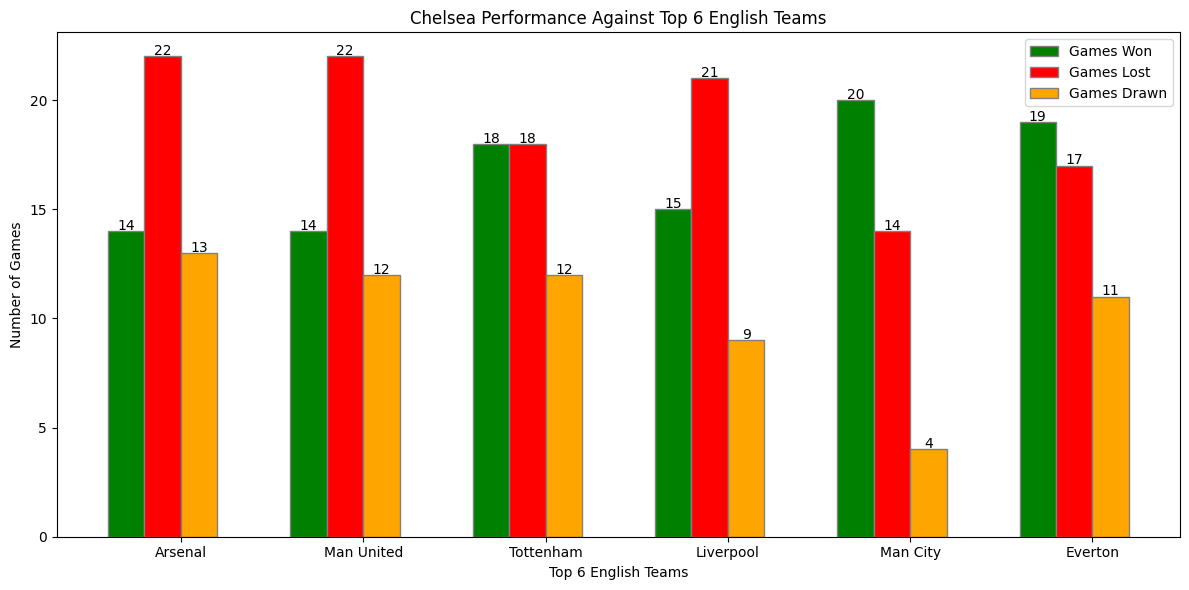

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Open the Excel file
excel_file_path = "final_dataset.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Identify the top 6 English teams
top_teams = ['Arsenal', 'Man United', 'Tottenham', 'Liverpool', 'Man City', 'Everton']

# Filter data for games involving Chelsea against top teams
chelsea_games_against_top_teams = df[(df['HomeTeam'] == 'Chelsea') & (df['AwayTeam'].isin(top_teams)) |
                                     (df['AwayTeam'] == 'Chelsea') & (df['HomeTeam'].isin(top_teams))]

# Initialize dictionaries to store game counts
game_counts = {'Team': [], 'Games Won': [], 'Games Lost': [], 'Games Drawn': []}

# Calculate game counts for each top team
for team in top_teams:
    games_played = len(chelsea_games_against_top_teams[
        (chelsea_games_against_top_teams['HomeTeam'] == 'Chelsea') & (chelsea_games_against_top_teams['AwayTeam'] == team) |
        (chelsea_games_against_top_teams['AwayTeam'] == 'Chelsea') & (chelsea_games_against_top_teams['HomeTeam'] == team)
    ])

    home_wins = len(chelsea_games_against_top_teams[
        (chelsea_games_against_top_teams['HomeTeam'] == 'Chelsea') &
        (chelsea_games_against_top_teams['AwayTeam'] == team) &
        (chelsea_games_against_top_teams['FTW'] == 'Chelsea')
    ])

    away_wins = len(chelsea_games_against_top_teams[
        (chelsea_games_against_top_teams['AwayTeam'] == 'Chelsea') &
        (chelsea_games_against_top_teams['HomeTeam'] == team) &
        (chelsea_games_against_top_teams['FTW'] == 'Chelsea')
    ])

    wins = home_wins + away_wins

    losses = len(chelsea_games_against_top_teams[
        ((chelsea_games_against_top_teams['HomeTeam'] == 'Chelsea') &
         (chelsea_games_against_top_teams['AwayTeam'] == team) &
         (chelsea_games_against_top_teams['FTW'] != 'Chelsea')) |
        ((chelsea_games_against_top_teams['AwayTeam'] == 'Chelsea') &
         (chelsea_games_against_top_teams['HomeTeam'] == team) &
         (chelsea_games_against_top_teams['FTW'] != 'Chelsea'))
    ])

    draws = len(chelsea_games_against_top_teams[
        ((chelsea_games_against_top_teams['HomeTeam'] == 'Chelsea') &
         (chelsea_games_against_top_teams['AwayTeam'] == team) &
         (chelsea_games_against_top_teams['FTW'] == 'Draw')) |
        ((chelsea_games_against_top_teams['AwayTeam'] == 'Chelsea') &
         (chelsea_games_against_top_teams['HomeTeam'] == team) &
         (chelsea_games_against_top_teams['FTW'] == 'Draw'))
    ])

    game_counts['Team'].append(team)
    game_counts['Games Won'].append(wins)
    game_counts['Games Lost'].append(losses)
    game_counts['Games Drawn'].append(draws)

# Convert the dictionary to a pandas DataFrame for easier plotting
game_counts_df = pd.DataFrame(game_counts)

# Plotting the bar graph with annotations
plt.figure(figsize=(12, 6))
bar_width = 0.2
r1 = range(len(top_teams))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, game_counts_df['Games Won'], color='green', width=bar_width, edgecolor='grey', label='Games Won')
plt.bar(r2, game_counts_df['Games Lost'], color='red', width=bar_width, edgecolor='grey', label='Games Lost')
plt.bar(r3, game_counts_df['Games Drawn'], color='orange', width=bar_width, edgecolor='grey', label='Games Drawn')

# Annotate bars with their values
for r, won, lost, drawn in zip(r1, game_counts_df['Games Won'], game_counts_df['Games Lost'], game_counts_df['Games Drawn']):
    plt.text(r, won + 0.05, str(won), ha='center')
    plt.text(r + bar_width, lost + 0.05, str(lost), ha='center')
    plt.text(r + 2 * bar_width, drawn + 0.05, str(drawn), ha='center')

plt.xlabel('Top 6 English Teams')
plt.ylabel('Number of Games')
plt.title('Chelsea Performance Against Top 6 English Teams')
plt.xticks([r + 1.5 * bar_width for r in range(len(top_teams))], game_counts_df['Team'])
plt.legend()
plt.tight_layout()
plt.show()
